In [2]:
import tensorflow as tf
print(tf.keras.__version__)


3.8.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
train_dir = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Test"
test_dir = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Test"

Training set : (2999, 28, 28, 1), Labels :(2999, 10)
Testing set : (2999, 28, 28, 1), Labels:  (2999, 10)


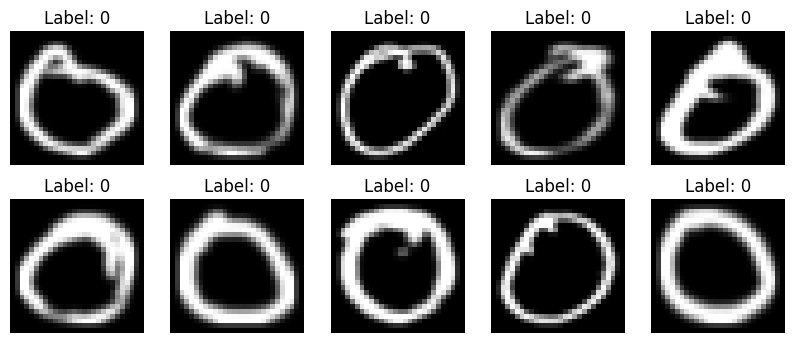

In [7]:
img_height , img_width = 28, 28
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    class_map = {name : i for i , name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize((img_width, img_height))
            img = np.array(img) / 255.0
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)


x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Training set : {x_train.shape}, Labels :{y_train.shape}")
print(f"Testing set : {x_test.shape}, Labels:  {y_test.shape}")

plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2,5,i + 1)
  plt.imshow(x_train[i].reshape(28,28), cmap = "gray")
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")

plt.show()

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():
  inputs = keras.Input(shape=input_shape)
  x = keras.layers.Flatten()(inputs)
  x = keras.layers.Dense(64, activation="sigmoid")(x)
  x = keras.layers.Dense(128, activation = "sigmoid")(x)
  x = keras.layers.Dense(256, activation = "sigmoid")(x)

  outputs = keras.layers.Dense(num_classes,activation="softmax")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
functional_model.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [16]:
batch_size = 128
epochs=2000
callbacks=[
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]

history=functional_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)

Epoch 1/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1027 - loss: 2.3149 - val_accuracy: 0.1063 - val_loss: 2.3037
Epoch 2/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1126 - loss: 2.3016 - val_accuracy: 0.1063 - val_loss: 2.3003
Epoch 3/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1123 - loss: 2.2998 - val_accuracy: 0.1063 - val_loss: 2.2998
Epoch 4/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1152 - loss: 2.2985 - val_accuracy: 0.1063 - val_loss: 2.2972
Epoch 5/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1227 - loss: 2.2966 - val_accuracy: 0.1063 - val_loss: 2.2975
Epoch 6/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1221 - loss: 2.2952 - val_accuracy: 0.1063 - val_loss: 2.2964
Epoch 7/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1311 - loss: 2.2932 - val_accuracy: 0.1086 - val_loss: 2.2917
Epoch 8/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1291 - loss: 2.2908 - 

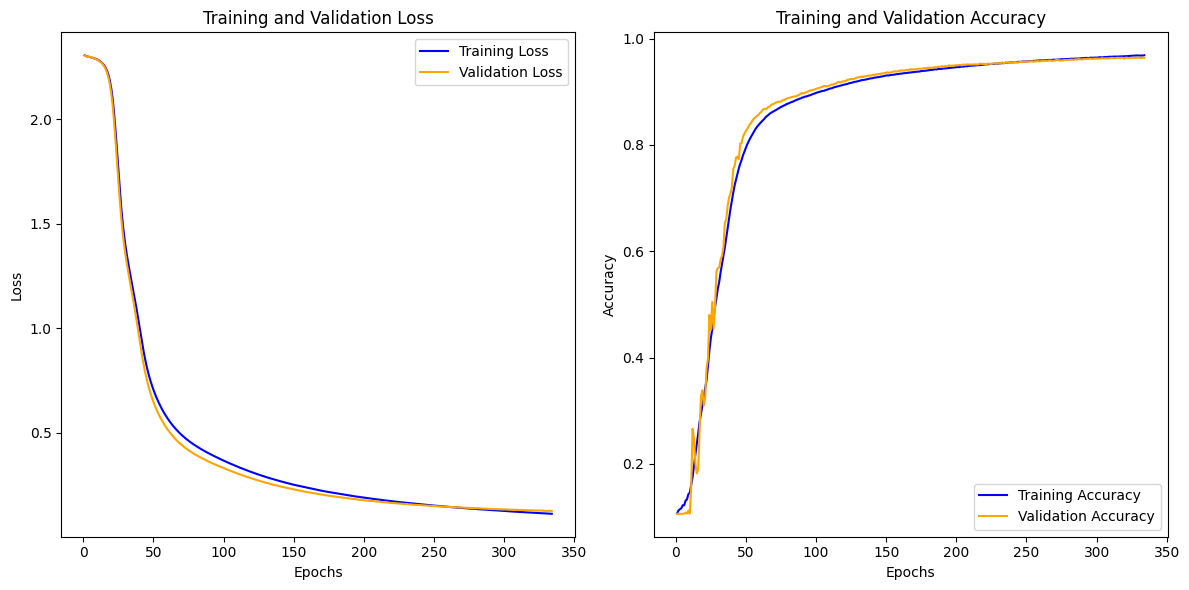

In [17]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# Predict on test data
predictions = functional_model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 7
True label for first image: 7


In [19]:
functional_model.save('mnist_fully_connected_model.h5')

In [20]:
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')